In [1]:
import numpy as np
import MDAnalysis as mda
from nmrdfrommd import NMRD

/home/simon/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
datapath = "../data/"

u = mda.Universe(datapath+"prod.gro",
                 datapath+"prod.xtc")

In [5]:
H_H2O = u.select_atoms("name HW1 HW2")
H_SIL = u.select_atoms("name H")
H_ALL = H_H2O + H_SIL

In [6]:
timestep = np.int32(u.trajectory.dt)
total_time = np.int32(u.trajectory.totaltime)

print(f"The timestep is {timestep} ps")
print(f"The total simulation time is {total_time//1000} ns")

The timestep is 2 ps
The total simulation time is 10 ns


In [14]:
nmr_full= NMRD(
    u=u,
    atom_group=H_ALL,
    isotropic = False,
    type_analysis="full",
    number_i=5)
nmr_full.run_analysis()

In [15]:
T1 = np.round(nmr_full.T1, 2)

print(f"The NMR relaxation time is T1 = {T1} s")

The NMR relaxation time is T1 = 1.79 s


In [22]:
R1_full = nmr_full.R1
R2_full = nmr_full.R2
f_full = nmr_full.f

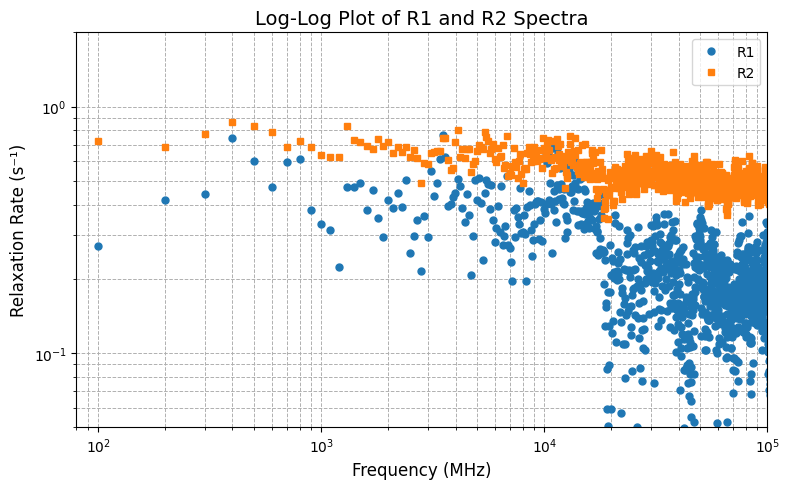

In [23]:
from matplotlib import pyplot as plt

# Plot settings
plt.figure(figsize=(8, 5))
plt.loglog(f_full, R1_full, 'o', label='R1', markersize=5)
plt.loglog(f_full, R2_full, 's', label='R2', markersize=5)

# Labels and Title
plt.xlabel("Frequency (MHz)", fontsize=12)
plt.ylabel("Relaxation Rate (s⁻¹)", fontsize=12)
plt.title("Log-Log Plot of R1 and R2 Spectra", fontsize=14)

# Grid and boundaries
plt.grid(True, which="both", linestyle='--', linewidth=0.7)
plt.xlim(80, 1e5)
plt.ylim(0.05, 2)

# Legend
plt.legend()
plt.tight_layout()
plt.show()


In [18]:
nmr_water_silica = NMRD(
    u=u,
    atom_group=H_H2O,
    neighbor_group = H_SIL,
    isotropic = False,
    type_analysis="full",
    number_i=50)
nmr_water_silica.run_analysis()

In [20]:
R1_water_silica = nmr_water_silica.R1
R2_water_silica = nmr_water_silica.R2
f_water_silica = nmr_water_silica.f

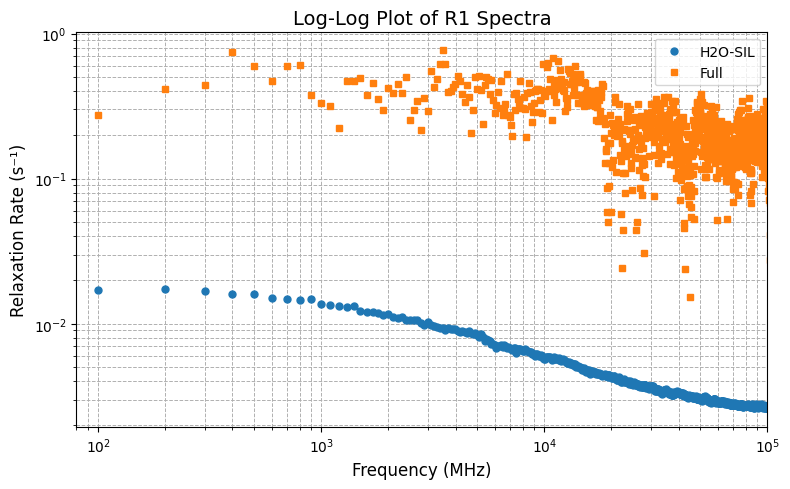

In [27]:
# Plot settings
plt.figure(figsize=(8, 5))
plt.loglog(f_water_silica, R1_water_silica, 'o', label='H2O-SIL', markersize=5)
plt.loglog(f_full, R1_full, 's', label='Full', markersize=5)

# Labels and Title
plt.xlabel("Frequency (MHz)", fontsize=12)
plt.ylabel("Relaxation Rate (s⁻¹)", fontsize=12)
plt.title("Log-Log Plot of R1 Spectra", fontsize=14)

# Grid and boundaries
plt.grid(True, which="both", linestyle='--', linewidth=0.7)
plt.xlim(80, 1e5)
# plt.ylim(0.02, 2)

# Legend
plt.legend()
plt.tight_layout()
plt.show()

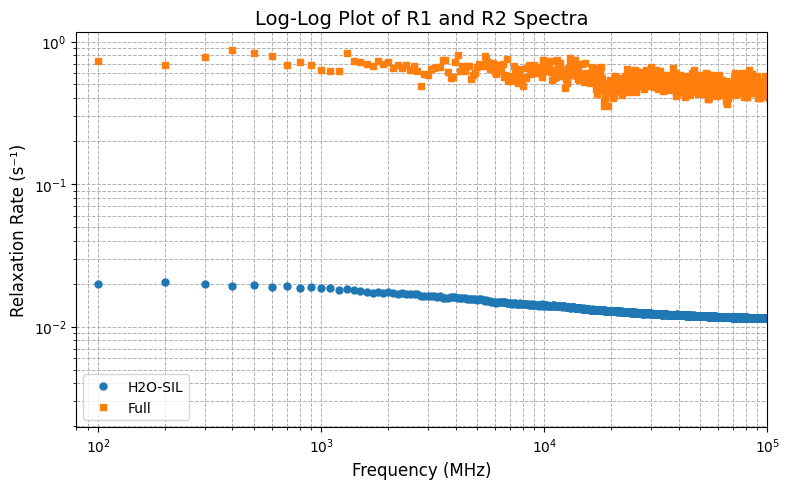

In [ ]:
# Plot settings
plt.figure(figsize=(8, 5))
plt.loglog(f_water_silica, R2_water_silica, 'o', label='H2O-SIL', markersize=5)
plt.loglog(f_full, R2_full, 's', label='Full', markersize=5)

# Labels and Title
plt.xlabel("Frequency (MHz)", fontsize=12)
plt.ylabel("Relaxation Rate (s⁻¹)", fontsize=12)
plt.title("Log-Log Plot of R2 Spectra", fontsize=14)

# Grid and boundaries
plt.grid(True, which="both", linestyle='--', linewidth=0.7)
plt.xlim(80, 1e5)
# plt.ylim(0.02, 2)

# Legend
plt.legend()
plt.tight_layout()
plt.show()